<a href="https://colab.research.google.com/github/laresamdeola/Machine-Learning/blob/main/Maternal_Health_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [2]:
# # Number of data points
# n = 1000

# # Generate synthetic data
# np.random.seed(42)
# data = pd.DataFrame({
#     'user_id': np.random.randint(1, 100, n),
#     'exercise': np.random.choice(['Heel Slides', 'Ankle Pumps', 'Leg Raises'], n),
#     'heart_rate': np.random.randint(60, 140, n),
#     'bmi': np.random.uniform(18.5, 35, n),
#     'duration': np.random.randint(5, 30, n),  # duration in minutes
#     'intensity': np.random.choice(['Low', 'Medium', 'High'], n),
#     'recovery': np.random.choice(['Improving', 'Worsening'], n)
# })

# print(data.head())

In [3]:
data = pd.read_csv('Maternal Health Risk Data Set.csv')

In [4]:
columns_list = list(data.columns)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
type(columns_list)

list

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
data['RiskLevel'] = label_encoder.fit_transform(data['RiskLevel'])

# Select relevant features
features = columns_list[:-1]
target = columns_list[-1]

# Normalize the data
# scaler = StandardScaler()
# data[features] = scaler.fit_transform(data[features])

print(data[features].head())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0   25         130           80  15.0      98.0         86
1   35         140           90  13.0      98.0         70
2   29          90           70   8.0     100.0         80
3   30         140           85   7.0      98.0         70
4   35         120           60   6.1      98.0         76


In [8]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [9]:
data.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,-0.211851
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,-0.208797
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,-0.284633
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,-0.479958
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,-0.006680
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,-0.111637
RiskLevel,-0.211851,-0.208797,-0.284633,-0.479958,-0.006680,-0.111637,1.000000


In [10]:
data.corr().style.background_gradient(cmap='Pastel1')

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,-0.211851
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,-0.208797
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,-0.284633
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,-0.479958
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,-0.006680
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,-0.111637
RiskLevel,-0.211851,-0.208797,-0.284633,-0.479958,-0.006680,-0.111637,1.000000


In [11]:
X = data[features]
y = data[target]

In [12]:
y.unique()

array([0, 1, 2])

In [13]:
y.value_counts()

,count
RiskLevel,
1,406
2,336
0,272


In [14]:
print(type(data['Age']))

<class 'pandas.core.series.Series'>


In [15]:
# BS is Blood Sugar

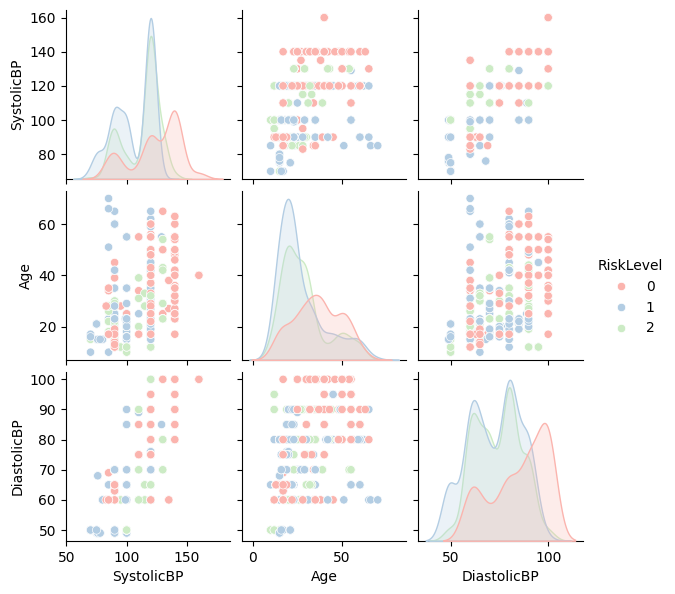

In [16]:
import seaborn as sns

sns.pairplot(data, hue="RiskLevel", vars=['SystolicBP', 'Age', 'DiastolicBP'], height=2, palette='Pastel1')
plt.show()

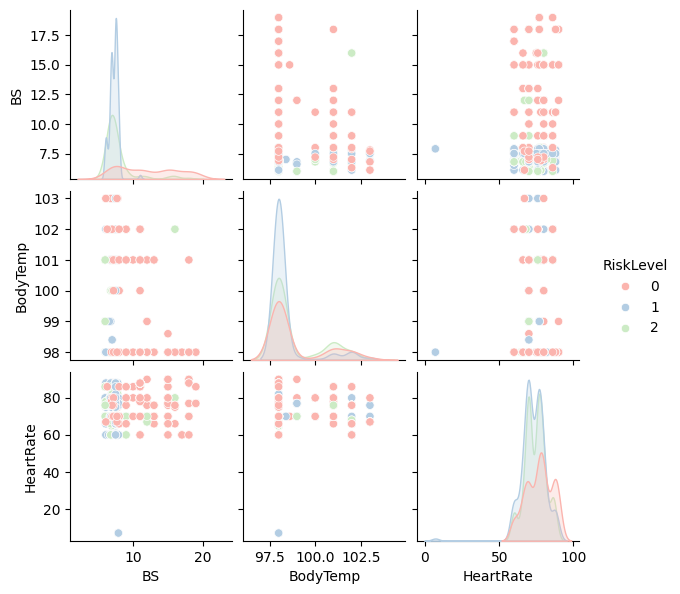

In [17]:
sns.pairplot(data, hue="RiskLevel", vars=['BS', 'BodyTemp', 'HeartRate'], height=2, palette='Pastel1')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest

In [19]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# get the probabilities from the model - to graph the ROC-Curve
y_prob = model.predict_proba(X_test)[:, 1]

Accuracy: 0.812807881773399
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.86      0.76      0.81        80
           2       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



In [20]:
type(X_test)

pandas.core.frame.DataFrame

Decision Tree

In [21]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# make predictions
y_pred_dt = dt_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# get the probabilities from the model - to graph the ROC-Curve
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

Accuracy: 0.7931034482758621
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        47
           1       0.85      0.71      0.78        80
           2       0.73      0.84      0.78        76

    accuracy                           0.79       203
   macro avg       0.80      0.80      0.80       203
weighted avg       0.80      0.79      0.79       203



In [22]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# make predictions
y_pred_nb = nb_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# get the probabilities from the model - to graph the ROC-Curve
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

Accuracy: 0.5763546798029556
              precision    recall  f1-score   support

           0       0.79      0.64      0.71        47
           1       0.52      0.91      0.66        80
           2       0.56      0.18      0.28        76

    accuracy                           0.58       203
   macro avg       0.62      0.58      0.55       203
weighted avg       0.60      0.58      0.53       203



XGBoost

In [23]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# make predictions
y_pred_xgb = xgb_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# get the probabilities from the model - to graph the ROC-Curve
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

Accuracy: 0.8423645320197044
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.87      0.82      0.85        80
           2       0.81      0.84      0.83        76

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:59:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [24]:
import joblib

joblib.dump(xgb_model, 'materna_xgb_model.pkl')

['materna_xgb_model.pkl']

Logistic Regression

In [25]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# make predictions
y_pred_lr = lr_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# get the probabilities from the model - to graph the ROC-Curve
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

Accuracy: 0.6305418719211823
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        47
           1       0.55      0.90      0.69        80
           2       0.71      0.29      0.41        76

    accuracy                           0.63       203
   macro avg       0.69      0.64      0.62       203
weighted avg       0.67      0.63      0.60       203



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM

In [26]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# make predictions
y_pred_svm = svm_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# get the probabilities from the model - to graph the ROC-Curve
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

Accuracy: 0.5960591133004927
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        47
           1       0.52      0.93      0.67        80
           2       0.61      0.25      0.36        76

    accuracy                           0.60       203
   macro avg       0.68      0.59      0.58       203
weighted avg       0.65      0.60      0.56       203



Stacking Classifier

In [27]:
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('lr', LogisticRegression()),
    ('svm', SVC(probability=True))
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=xgb_model)

In [28]:
stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:59:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:59:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: User

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('nb', GaussianNB()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              im...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 objective='multi:softprob', ...))

In [29]:
y_prob_stacking = stacking_model.predict_proba(X_test)[:, 1]

# make predictions
y_pred_stacking = stacking_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))

Accuracy: 0.8374384236453202
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        47
           1       0.86      0.82      0.84        80
           2       0.81      0.82      0.81        76

    accuracy                           0.84       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203



In [30]:
print(stacking_model)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('nb', GaussianNB()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              im...
                            

In [31]:
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)

# fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
# roc_auc_dt = auc(fpr_dt, tpr_dt)

# fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
# roc_auc_nb = auc(fpr_nb, tpr_nb)

# fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
# roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
# roc_auc_lr = auc(fpr_lr, tpr_lr)

# fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
# roc_auc_svm = auc(fpr_svm, tpr_svm)

# fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_prob_stacking)
# roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

In [32]:
# plt.figure(figsize=(10, 8))

# plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
# plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
# plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
# plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
# plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
# plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
# plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')

# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

In [33]:
def highlight_max(value, props=''):
    return np.where(value == np.nanmax(value.values), props, '')

In [64]:
def highlight_max_and_second_max(value, max_props='', second_max_props=''):
  max_value = np.nanmax(value.values)
  second_max_value = np.nanmax(value.values[value.values != max_value])

  return np.where(value == max_value, max_props,
                  np.where(value == second_max_value, second_max_props, ''))

In [35]:
# # RF

# Accuracy: 0.812807881773399
#               precision    recall  f1-score   support

#            0       0.87      0.85      0.86        47
#            1       0.86      0.76      0.81        80
#            2       0.74      0.84      0.79        76

#     accuracy                           0.81       203
#    macro avg       0.82      0.82      0.82       203
# weighted avg       0.82      0.81      0.81       203

# # DT

# Accuracy: 0.8029556650246306
#               precision    recall  f1-score   support

#            0       0.87      0.85      0.86        47
#            1       0.86      0.74      0.79        80
#            2       0.73      0.84      0.78        76

#     accuracy                           0.80       203
#    macro avg       0.82      0.81      0.81       203
# weighted avg       0.81      0.80      0.80       203

# # NB

# Accuracy: 0.5763546798029556
#               precision    recall  f1-score   support

#            0       0.79      0.64      0.71        47
#            1       0.52      0.91      0.66        80
#            2       0.56      0.18      0.28        76

#     accuracy                           0.58       203
#    macro avg       0.62      0.58      0.55       203
# weighted avg       0.60      0.58      0.53       203

# # XGB

# Accuracy: 0.8423645320197044
#               precision    recall  f1-score   support

#            0       0.85      0.87      0.86        47
#            1       0.87      0.82      0.85        80
#            2       0.81      0.84      0.83        76

#     accuracy                           0.84       203
#    macro avg       0.84      0.85      0.85       203
# weighted avg       0.84      0.84      0.84       203

# # LR

# Accuracy: 0.6305418719211823
#               precision    recall  f1-score   support

#            0       0.81      0.72      0.76        47
#            1       0.55      0.90      0.69        80
#            2       0.71      0.29      0.41        76

#     accuracy                           0.63       203
#    macro avg       0.69      0.64      0.62       203
# weighted avg       0.67      0.63      0.60       203

# # SVC

# Accuracy: 0.5960591133004927
#               precision    recall  f1-score   support

#            0       0.90      0.60      0.72        47
#            1       0.52      0.93      0.67        80
#            2       0.61      0.25      0.36        76

#     accuracy                           0.60       203
#    macro avg       0.68      0.59      0.58       203
# weighted avg       0.65      0.60      0.56       203

# # Stacking

# Accuracy: 0.8423645320197044
#               precision    recall  f1-score   support

#            0       0.86      0.89      0.88        47
#            1       0.88      0.80      0.84        80
#            2       0.80      0.86      0.83        76

#     accuracy                           0.84       203
#    macro avg       0.85      0.85      0.85       203
# weighted avg       0.84      0.84      0.84       203

In [85]:
# Class 2

models_index_class_2 = ['Random Forest', 'Decision Trees', 'Naive Bayes', 'XGBoost', 'Logistic Regression',
                'SVC', 'Stacking']

classifier_metrics_class_2 = {
    "Precision": [0.74, 0.73, 0.56, 0.81, 0.71, 0.61, 0.80],
    "Recall": [0.84, 0.84, 0.18, 0.84, 0.29, 0.25, 0.86],
    "f1-score": [0.79, 0.78, 0.28, 0.83, 0.41, 0.36, 0.83],
    "Accuracy": [0.81, 0.8, 0.58, 0.84, 0.63, 0.6, 0.84]
}

df_class_2 = pd.DataFrame(classifier_metrics_class_2, index=models_index_class_2)

# df.style.apply(highlight_max, props='color:white;background-color:#e9967a', axis=0)

# background colours - palevioletred, plum

df_class_2.style.apply(highlight_max_and_second_max, max_props='color:white;background-color:#db7093', second_max_props='color:white;background-color:#dda0dd', axis=0)

,Precision,Recall,f1-score,Accuracy
Random Forest,0.740000,0.840000,0.790000,0.810000
Decision Trees,0.730000,0.840000,0.780000,0.800000
Naive Bayes,0.560000,0.180000,0.280000,0.580000
XGBoost,0.810000,0.840000,0.830000,0.840000
Logistic Regression,0.710000,0.290000,0.410000,0.630000
SVC,0.610000,0.250000,0.360000,0.600000
Stacking,0.800000,0.860000,0.830000,0.840000


In [84]:
# Class 1

models_index_class_1 = ['Random Forest', 'Decision Trees', 'Naive Bayes', 'XGBoost', 'Logistic Regression',
                'SVC', 'Stacking']

classifier_metrics_class_1 = {
    "Precision": [0.86, 0.86, 0.52, 0.87, 0.55, 0.52, 0.88],
    "Recall": [0.76, 0.74, 0.91, 0.82, 0.90, 0.93, 0.80],
    "f1-score": [0.81, 0.79, 0.66, 0.85, 0.69, 0.67, 0.84],
    "Accuracy": [0.81, 0.8, 0.58, 0.84, 0.63, 0.6, 0.84]
}

df_class_1 = pd.DataFrame(classifier_metrics_class_1, index=models_index_class_1)

# df.style.apply(highlight_max, props='color:white;background-color:#e9967a', axis=0)

# background colours - palevioletred, plum

df_class_1.style.apply(highlight_max_and_second_max, max_props='color:white;background-color:#db7093', second_max_props='color:white;background-color:#dda0dd', axis=0)

,Precision,Recall,f1-score,Accuracy
Random Forest,0.860000,0.760000,0.810000,0.810000
Decision Trees,0.860000,0.740000,0.790000,0.800000
Naive Bayes,0.520000,0.910000,0.660000,0.580000
XGBoost,0.870000,0.820000,0.850000,0.840000
Logistic Regression,0.550000,0.900000,0.690000,0.630000
SVC,0.520000,0.930000,0.670000,0.600000
Stacking,0.880000,0.800000,0.840000,0.840000


In [83]:
# Class 0

models_index = ['Random Forest', 'Decision Trees', 'Naive Bayes', 'XGBoost', 'Logistic Regression',
                'SVC', 'Stacking']

classifier_metrics = {
    "Precision": [0.87, 0.87, 0.79, 0.85, 0.81, 0.90, 0.86],
    "Recall": [0.85, 0.85, 0.64, 0.87, 0.72, 0.60, 0.89],
    "f1-score": [0.86, 0.86, 0.71, 0.86, 0.76, 0.72, 0.88],
    "Accuracy": [0.81, 0.8, 0.58, 0.84, 0.63, 0.6, 0.84]
}


df = pd.DataFrame(classifier_metrics, index=models_index)
# df = pd.DataFrame(classifier_metrics, index=models_index)

# df.style.apply(highlight_max, props='color:white;background-color:#e9967a', axis=0)

# background colours - palevioletred, plum

df.style.apply(highlight_max_and_second_max, max_props='color:white;background-color:#db7093', second_max_props='color:white;background-color:#dda0dd', axis=0)

,Precision,Recall,f1-score,Accuracy
Random Forest,0.870000,0.850000,0.860000,0.810000
Decision Trees,0.870000,0.850000,0.860000,0.800000
Naive Bayes,0.790000,0.640000,0.710000,0.580000
XGBoost,0.850000,0.870000,0.860000,0.840000
Logistic Regression,0.810000,0.720000,0.760000,0.630000
SVC,0.900000,0.600000,0.720000,0.600000
Stacking,0.860000,0.890000,0.880000,0.840000


In [47]:
import pandas as pd

# Example DataFrame with a default index
data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6]
}
df = pd.DataFrame(data)

# Reset the index and drop the default index column
df = df.reset_index(drop=True)

# Display the DataFrame
print(df)


   A  B
0  1  4
1  2  5
2  3  6


In [39]:
print(df.columns)

Index(['Models', 'Precision', 'Recall', 'f1-score', 'Accuracy'], dtype='object')


In [40]:
classifier_metrics = {
    'Accuracy': [0.49, 0.51, 0.52, 0.53, 0.52, 0.50, 0.48],
    'Precision': [0.48, 0.49, 0.49, 0.50, 0.49, 0.48, 0.45],
    'Recall': [0.63, 0.52, 0.71, 0.63, 0.75, 0.72, 0.53],
    'f1-score': [0.54, 0.50, 0.58, 0.56, 0.59, 0.58, 0.49]
}

index_data = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'XGBoost', 'Logistic Regression', 'SVM', 'Stacking Classifier']

model_df = pd.DataFrame(classifier_metrics, index=index_data)

In [41]:
model_df

,Accuracy,Precision,Recall,f1-score
Random Forest,0.49,0.48,0.63,0.54
Decision Tree,0.51,0.49,0.52,0.50
Naive Bayes,0.52,0.49,0.71,0.58
XGBoost,0.53,0.50,0.63,0.56
Logistic Regression,0.52,0.49,0.75,0.59
SVM,0.50,0.48,0.72,0.58
Stacking Classifier,0.48,0.45,0.53,0.49


In [42]:
def highlight_max(value, props=''):
    return np.where(value == np.nanmax(value.values), props, '')

In [43]:
model_df.style.apply(highlight_max, props='color:black;background-color:antiquewhite', axis=0)

,Accuracy,Precision,Recall,f1-score
Random Forest,0.490000,0.480000,0.630000,0.540000
Decision Tree,0.510000,0.490000,0.520000,0.500000
Naive Bayes,0.520000,0.490000,0.710000,0.580000
XGBoost,0.530000,0.500000,0.630000,0.560000
Logistic Regression,0.520000,0.490000,0.750000,0.590000
SVM,0.500000,0.480000,0.720000,0.580000
Stacking Classifier,0.480000,0.450000,0.530000,0.490000


In [44]:
aclr_amt_patients = [697, 1545, 2240, 2555, 2868, 2693, 2706, 1536, 1731]
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

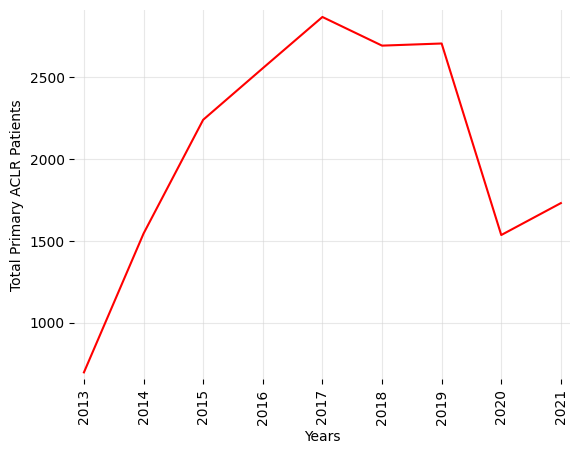

In [45]:
plt.plot(years, aclr_amt_patients, color = 'r')
plt.ylabel('Total Primary ACLR Patients')
plt.xlabel('Years')
plt.margins(0.02)
plt.xticks(years, rotation='vertical')
plt.grid(color="lightgray", alpha=0.5, zorder=1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()